# 207 Calculate NNCE for FaIR

In this notebook, we calculate the net negative emission requirements for the FaIR ensemble members to bring warming down to 1.5C.

In [1]:
import pyam
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from pathlib import Path

<IPython.core.display.Javascript object>

Let us change the font size that we are working with.

In [2]:
matplotlib.rcParams.update({'font.size': 12})

Step 1: Read in the necessary data.

In [3]:
df_temps = pyam.IamDataFrame(
    Path(
        'processed_data/205_temperatures.csv'
    )
)

pyam - INFO: Running in a notebook, setting up a basic logging at level INFO
pyam.core - INFO: Reading file processed_data/205_temperatures.csv


In [4]:
df_metrics = pd.read_csv(
    Path(
        'processed_data/205_metrics.csv'
    )
)

Step 2: Let us plot out the eTCREdown. We want to find the run where all ensemble members are cooling,

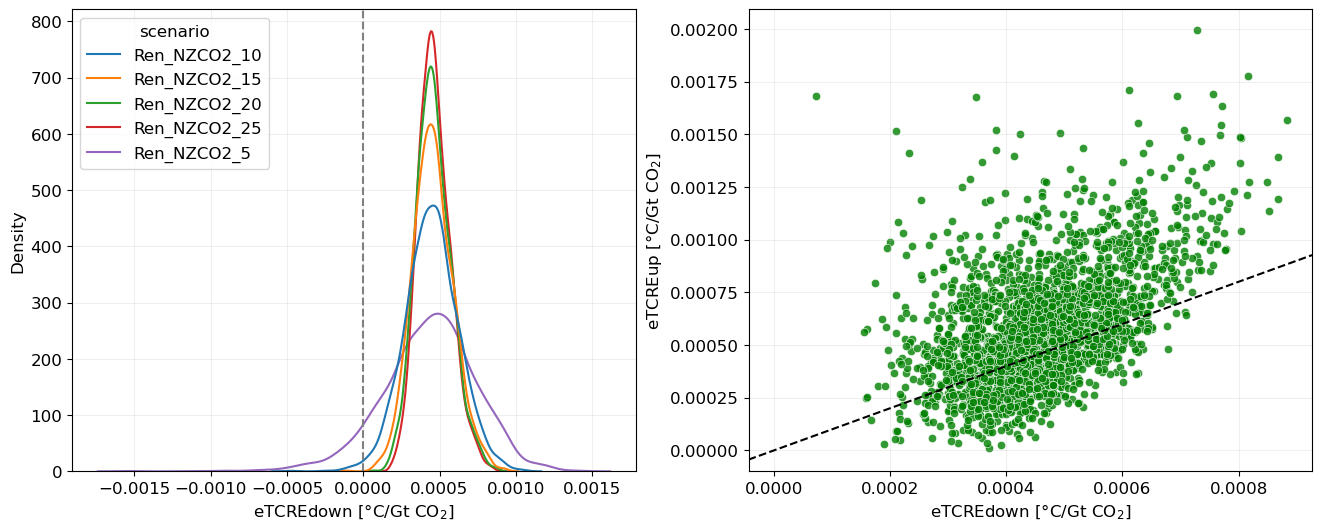

In [5]:
fig,ax = plt.subplots(1,2, figsize=(16,6))
## Panel 1: only eTCRE down
sns.kdeplot(
    data=df_metrics,
    x='etcre_down',
    hue='scenario',
    ax=ax[0]
)

# Add annotations
ax[0].axvline(
    0,
    color='grey',
    linestyle='dashed'
)
ax[0].set_xlabel(
    'eTCREdown [°C/Gt CO$_2$]'
)
#ax.grid(alpha=0.3)

## Panel 2: eTCREup versus eTCREdown
panel_2_data = df_metrics[df_metrics.scenario.isin(['Ren_NZCO2_20'])]
sns.scatterplot(
    data=panel_2_data,
    x='etcre_down',
    y='etcre_up',
    c='green',
    alpha=0.8
)
ax[1].axline(
    (0, 0), 
    slope=1,
    color='black',
    linestyle='dashed'
)
ax[1].set_ylabel(
    'eTCREup [°C/Gt CO$_2$]'
)
ax[1].set_xlabel(
    'eTCREdown [°C/Gt CO$_2$]'
)

for a in ax:
    a.grid(alpha=0.2)
    #a.text()

Step 3: Save this figure out for the SI.

In [6]:
fig.savefig(
    Path(
        'figures/SI_fig2.png'
    ),
    dpi=800,
    bbox_inches='tight'
)

Step 4: Read in the TCRE and ZEC estimates.

In [7]:
zec_estimates = pd.read_excel(
    Path(
        'processed_data/206_proc_fair_ren_nzco2.xlsx'
    )
)

Step 5: Filter for the Ren_NZCO2_20 scenarios and then merge the two dataframes for further calculation.

In [8]:
zec_estimates.loc[:,'scenario'] = (
    zec_estimates
    .loc[:,'scenario']
    .apply(
        lambda x: x.replace(
            'Ren_NZCO2',
            'Ren_NZCO2_20'
        )
    )
)

In [9]:
df_metrics

model      scenario region  \
0      REMIND-MAgPIE 2.1-4.3  Ren_NZCO2_10  World   
1      REMIND-MAgPIE 2.1-4.3  Ren_NZCO2_10  World   
2      REMIND-MAgPIE 2.1-4.3  Ren_NZCO2_10  World   
3      REMIND-MAgPIE 2.1-4.3  Ren_NZCO2_10  World   
4      REMIND-MAgPIE 2.1-4.3  Ren_NZCO2_10  World   
...                      ...           ...    ...   
11180  REMIND-MAgPIE 2.1-4.3   Ren_NZCO2_5  World   
11181  REMIND-MAgPIE 2.1-4.3   Ren_NZCO2_5  World   
11182  REMIND-MAgPIE 2.1-4.3   Ren_NZCO2_5  World   
11183  REMIND-MAgPIE 2.1-4.3   Ren_NZCO2_5  World   
11184  REMIND-MAgPIE 2.1-4.3   Ren_NZCO2_5  World   

                             variable unit climate_model  \
0      Surface Air Temperature Change    K    FaIRv1.6.2   
1      Surface Air Temperature Change    K    FaIRv1.6.2   
2      Surface Air Temperature Change    K    FaIRv1.6.2   
3      Surface Air Temperature Change    K    FaIRv1.6.2   
4      Surface Air Temperature Change    K    FaIRv1.6.2   
...                               ...  ...           ...   
11180  Surface Air Temperature Change    K    FaIRv1.6.2   
11181  Surface Air Temperature Change    K    FaIRv1.6.2   
11182  Surface Air Temperature Change    K    FaIRv1.6.2   
11183  Surface Air Temperature Change    K    FaIRv1.6.2   
11184  Surface Air Temperature Change    K    FaIRv1.6.2   

       reference_period_end_year  reference_period_start_year  run_id  \
0                           1900                         1850       0   
1                           1900                         1850       1   
2                           1900                         1850       2   
3                           1900                         1850       3   
4                           1900                         1850       4   
...                          ...                          ...     ...   
11180                       1900                         1850    2232   
11181                       1900                         1850    2233   
11182                       1900                         1850    2234   
11183                       1900                         1850    2235   
11184                       1900                         1850    2236   

       delta_t_2050_2015      2050  delta_t_2100_2060      2100  \
0               0.370567  1.555787          -0.284095  1.212966   
1               0.139291  1.220301          -0.110819  1.089904   
2               0.122223  1.022530          -0.134601  0.867708   
3               0.608232  1.789736          -0.080441  1.735221   
4               0.545797  1.566508          -0.196135  1.346970   
...                  ...       ...                ...       ...   
11180           0.334809  1.546666           0.011217  1.558678   
11181           0.394048  1.457985          -0.159973  1.256683   
11182           0.263563  1.523151          -0.121795  1.358427   
11183           0.212893  1.456472          -0.103488  1.307100   
11184           0.298017  1.641316          -0.112387  1.478037   

       cum_emissions_2015_2050  cum_emissions_2060_2100  etcre_up  etcre_down  
0                   727.118564              -412.597302  0.000510    0.000689  
1                   727.118564              -412.597302  0.000192    0.000269  
2                   727.118564              -412.597302  0.000168    0.000326  
3                   727.118564              -412.597302  0.000836    0.000195  
4                   727.118564              -412.597302  0.000751    0.000475  
...                        ...                      ...       ...         ...  
11180               727.118564              -212.597302  0.000460   -0.000053  
11181               727.118564              -212.597302  0.000542    0.000752  
11182               727.118564              -212.597302  0.000362    0.000573  
11183               727.118564              -212.597302  0.000293    0.000487  
11184               727.118564              -212.597302  0.000410    0.000529  

[11185 rows x 17 colum

In [10]:
zec_estimates.loc[:,'run_id'] = (
    zec_estimates
    .loc[:,'variable']
    .apply(
        lambda x: x.split('run_id_')[1]
    )
)

In [11]:
zec_estimates.rename(
    columns={
        'deltaT_2100_2060':'ezec'
    },
    inplace=True
)

In [12]:
zec_estimates.loc[:,'run_id'] = (
    zec_estimates
    .loc[:,'run_id']
    .astype(int)
)

/var/folders/yw/qzffs_jd1l3b0w2tk4cdqxj00000gn/T/ipykernel_65398/1597823098.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  zec_estimates.loc[:,'run_id'] = (


In [13]:
left_zec_metrics = zec_estimates.set_index(
    ['model', 'scenario', 'run_id']
).loc[:,[2060, 'ezec']]

In [14]:
right_df_metrics = (
    df_metrics
    .set_index(
        [
            'model',
            'scenario',
            'run_id'
        ]
    )
    .loc[pd.IndexSlice[:,'Ren_NZCO2_20',:],:]
)

In [15]:
compiled_df = pd.concat(
    [
        left_zec_metrics,
        right_df_metrics
    ],
    axis=1
)

Step 6: Assign a "target" level column.

In [16]:
target_level = 1.5

In [17]:
compiled_df.loc[:,'target_level_2100'] = target_level

Step 7: Calculate the difference between 2060 level and the target level.

In [18]:
compiled_df.loc[:, 'total_cooling_2060_2100'] = (
    compiled_df.loc[:,'target_level_2100']
    -
    compiled_df.loc[:,2060]
)

Step 8: Calculate the total cooling after subtracting ezec.

In [19]:
compiled_df.loc[:,'total_cooling_after_zec'] = (
    compiled_df.loc[:,'total_cooling_2060_2100']
    -
    compiled_df.loc[:,'ezec']
)

Step 8: Set the total cooling to zero if there is no additional cooling after ezec.

In [20]:
compiled_df.loc[:,'total_cooling_after_zec'] = (
    compiled_df.loc[:, 'total_cooling_after_zec']
    .apply(
        lambda x: x if x<0 else 0
    )
)

Step 9: Calculate the additional net-negative emissions.

In [21]:
compiled_df.loc[:, 'nnce_total'] = (
    compiled_df.loc[:,'total_cooling_after_zec']
    /
    compiled_df.loc[:,'etcre_down']
)

Step 10: Calculate the net-negative emissions just to ensure stabilisation.

In [22]:
compiled_df.loc[:, 'nnce_pos_zec_comp'] = (
    -compiled_df.loc[:,'ezec']
    /
    compiled_df.loc[:,'etcre_down']
)

Step 11: Set all the nnce_pos_zec_comp to zero if they are positive (implying negative ezec).

In [23]:
compiled_df.loc[:, 'nnce_pos_zec_comp'] = (
    compiled_df
    .loc[:,'nnce_pos_zec_comp']
    .apply(
        lambda x: x if x<0 else 0
    )
)

Step 12: Further, set these estimates to zero if 2060 warming is less than 1.5.

In [24]:
mask = compiled_df[compiled_df[2060]<1.5].index

In [25]:
compiled_df.loc[mask, 'nnce_pos_zec_comp'] = 0

Step 13: Calculate the net negative emissions necessary only for decline in temperatures.

In [26]:
compiled_df.loc[:, 'nnce_decline'] = (
    compiled_df.loc[:, 'nnce_total']
    -
    compiled_df.loc[:, 'nnce_pos_zec_comp']
)

In [27]:
compiled_df.loc[:,'nnce_decline'].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99])

count     2237.000000
mean      -250.279933
std        543.573867
min     -17114.362516
1%       -1808.656559
5%       -1066.969077
50%          0.000000
95%          0.000000
99%          0.000000
max          0.000000
Name: nnce_decline, dtype: float64

Step 14: Write this out for further assessment.

In [28]:
compiled_df.to_csv(
    Path(
        'processed_data/207_fair_nnce_estimates.csv'
    )
)